In [5]:
# 创建一个总的数据集，当作input
Data_count = 0
Data_set = []
Labels = []

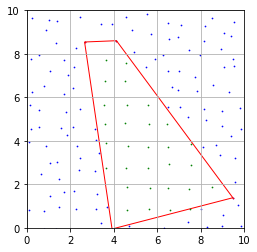

outside points number:  122
inside points number:  30
All points number: 152
 Dataset is legal!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from shapely.geometry import Point, Polygon
import random
from matplotlib.path import Path

# 第一步：生成间距为0.5距离的点，加上正负0.15的偏移，点尺寸设置为0.5
spacing = 0.8
offset = 0.3
point_size = 0.5

x_coords = np.arange(0, 10, spacing)
y_coords = np.arange(0, 10, spacing)

x_grid, y_grid = np.meshgrid(x_coords, y_coords)

x_grid += np.random.uniform(-offset, offset, size=x_grid.shape)
y_grid += np.random.uniform(-offset, offset, size=y_grid.shape)

points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

# 第二步：随机生成几个点构成闭包区域，并删除在闭包区域内部的第一步生成的点
num_hull_points = np.random.randint(4, 10)

hull_indices = np.random.choice(len(points), size=num_hull_points, replace=False)
hull_points = points[hull_indices]

# 计算凸包
hull = ConvexHull(hull_points)

# 获取凸包的边界点
hull_vertices = hull_points[hull.vertices]

# 使用Shapely库创建凸包多边形对象
polygon = Polygon(hull_vertices)

# 删除在闭包区域内部的点
outside_points = []
for point in points:
    if not polygon.contains(Point(point)):
        outside_points.append(point)

outside_points = np.array(outside_points)
#################################
convex_hull_path = Path(hull_vertices)

def generate_random_matrix(matrix_shape):
    return np.random.uniform(-0.1, 0.1, size=matrix_shape)


def generate_points_in_convex_hull(convex_hull, min_spacing, max_spacing):
    min_x = np.min(convex_hull[:, 0])
    max_x = np.max(convex_hull[:, 0])
    min_y = np.min(convex_hull[:, 1])
    max_y = np.max(convex_hull[:, 1])

    num_points_x = int((max_x - min_x) / min_spacing)
    num_points_y = int((max_y - min_y) / min_spacing)

    points = np.meshgrid(np.linspace(min_x, max_x, num_points_x),
                         np.linspace(min_y, max_y, num_points_y))
    points = np.vstack((points[0].flatten(), points[1].flatten())).T

    mask = convex_hull_path.contains_points(points)
    points = points[mask]

    return points

min_spacing_inside = 0.8
max_spacing_inside = 0.82
inside_points = generate_points_in_convex_hull(hull_vertices, min_spacing_inside, max_spacing_inside)
# 再加上随机扰动
inside_points = generate_random_matrix(inside_points.shape) + inside_points
for i in inside_points:
    for j in i:
        if j<0:
            j+=0.1
        if j>10:
            j-=0.1
for i in outside_points:
    for j in i:
        if j<0:
            j=0
        if j>10:
            j=10
#################################
# 可视化结果
plt.scatter(outside_points[:, 0], outside_points[:, 1], s=point_size, color='blue')
plt.scatter(hull_vertices[:, 0], hull_vertices[:, 1], s=point_size, color='red')
plt.fill(hull_vertices[:, 0], hull_vertices[:, 1], edgecolor='red', facecolor='none')
###
plt.scatter(inside_points[:, 0], inside_points[:, 1], s=point_size, color='green')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

# 
print('outside points number: ',len(outside_points))
print('inside points number: ',len(inside_points))
print('All points number:',len(outside_points)+len(inside_points))


##########################
if (len(outside_points)+len(inside_points))>160 or len(inside_points)<5:
    print('This rand dataset is illegal.')
else:
    print(' Dataset is legal!')
# 总的数据数组  
list_temp_allData = []
for i in outside_points:
    # 晶体
    list_temp_allData.append([i[0],i[1],1])
for j in inside_points:
    # 玻璃
    list_temp_allData.append([j[0],j[1],2])
# 再补上 补全数据
for i in range(160-len(outside_points)-len(inside_points)):
    list_temp_allData.append([0,0,0])

####################
temp_data = []
temp_label = []
for i in list_temp_allData:
    temp_data.append([i[0],i[1]])
    temp_label.append(i[2])

In [3]:
Data_set.append(temp_data)
Labels.append(temp_data)
Data_count+=1
Data_count

1

Is_save = 1
###  是否将生成数据存入文件夹
count = 0
save_path = r"C:\Users\zhang\Desktop\AI_test"
if len(outside_points)+len(inside_points)<160 and len(inside_points)>5:
    # 打开文件，以写入模式打开（'w'），如果文件不存在则创建
    with open("output.txt", "w") as file:
        # 循环写入数据
        for item in list_temp_allData:
            file.write(item + "\n")



